# 군집분석(3) : 모형 기반 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

# 데이터 준비

In [27]:
# 데이터 로드
wine_data = load_wine()
X = wine_data.data
feature_names = wine_data.feature_names

# 데이터 표준화
X = StandardScaler().fit_transform(X)

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_8011/4058109063.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


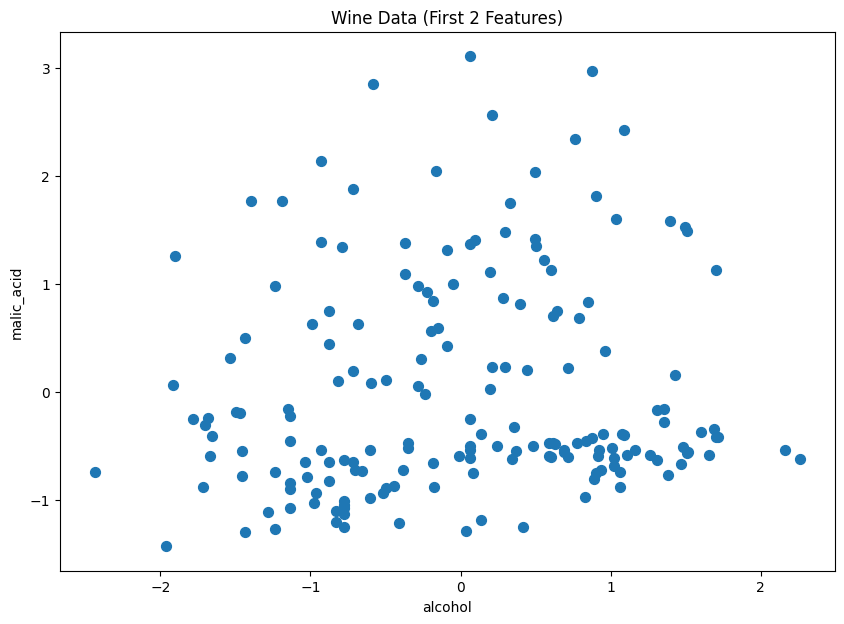

In [28]:
# 데이터 시각화 (첫 두 특징만 사용)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Wine Data (First 2 Features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# Gaussian Mixture Model

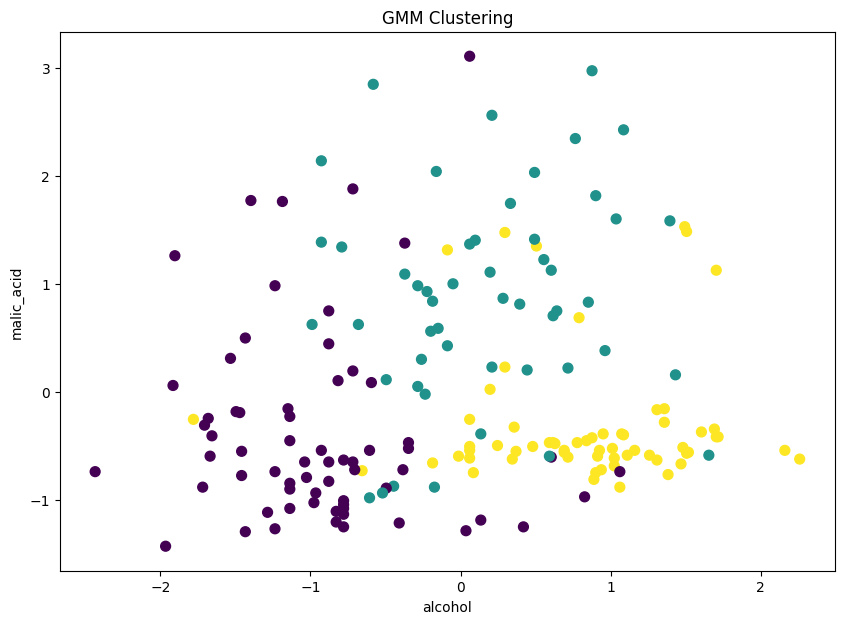

GMM에서 결정된 군집 수: 3


In [29]:
# Gaussian Mixture Model 군집 분석
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0)
gmm_labels = gmm.fit_predict(X)

# GMM 군집 시각화 (첫 두 특징만 사용)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# 군집 수 확인
unique_labels = np.unique(gmm_labels)
print(f"GMM에서 결정된 군집 수: {len(unique_labels)}")

# Mean Shift Clustering

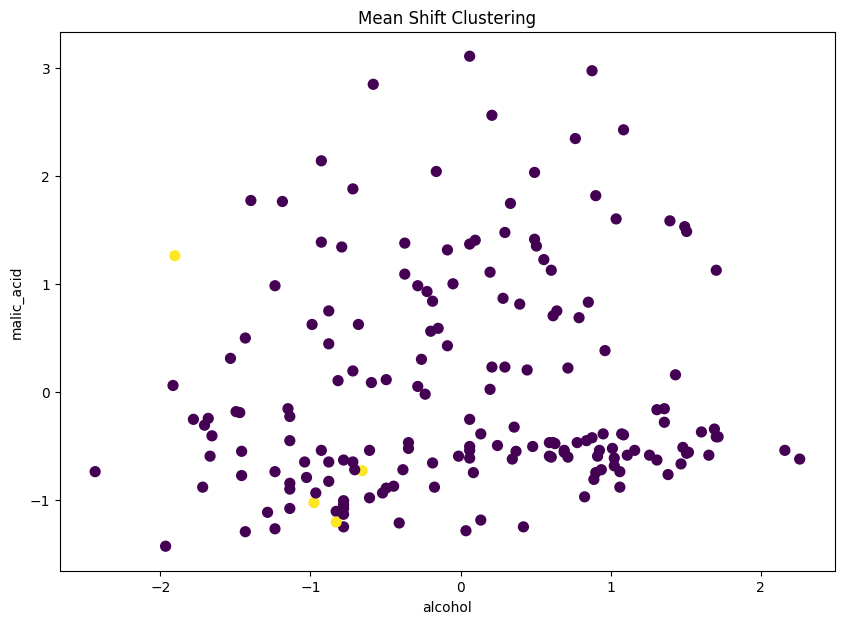

Mean Shift에서 결정된 군집 수: 2


In [31]:
# Mean Shift 군집 분석
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X)

# Mean Shift 군집 시각화 (첫 두 특징만 사용)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=mean_shift_labels, s=50, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# 군집 수 확인
unique_labels_mean_shift = np.unique(mean_shift_labels)
print(f"Mean Shift에서 결정된 군집 수: {len(unique_labels_mean_shift)}")

# Kmeans와의 비교

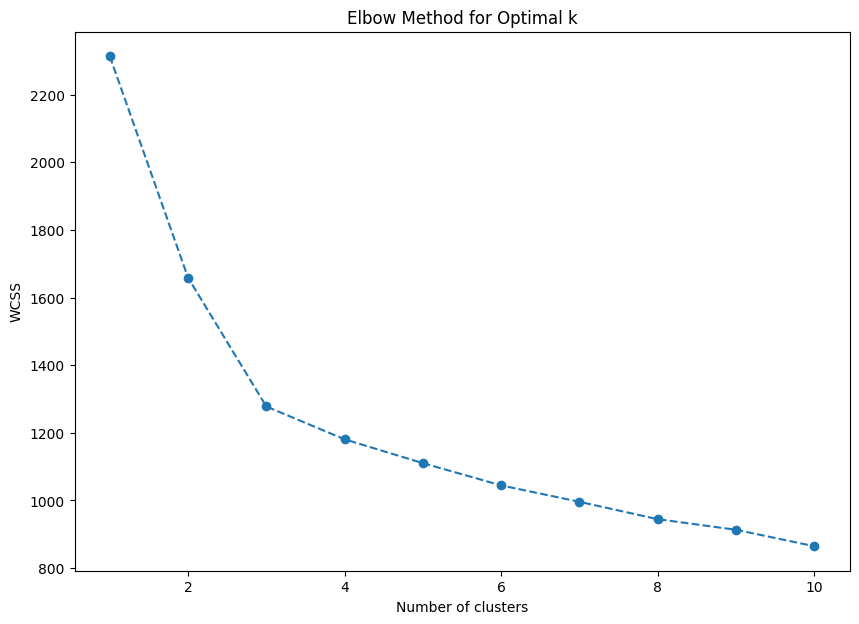

In [32]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# 최적의 군집 수 결정 (예: 엘보우 방법에서 3으로 결정된 경우)
optimal_clusters = 3

# KMeans 군집 분석
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

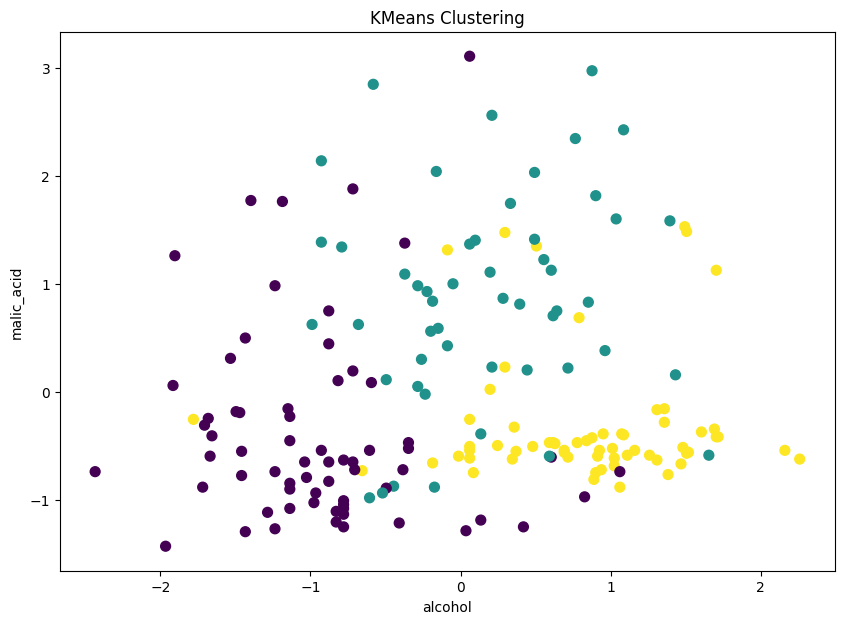

KMeans에서 결정된 군집 수: 3


In [36]:
# KMeans 군집 시각화 (첫 두 특징만 사용)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# 군집 수 확인
print(f"KMeans에서 결정된 군집 수: {optimal_clusters}")

# 비교분석

In [37]:
# NbClust로 군집 수 결정 (예: kmeans와 함께 사용하여 결정된 경우)
optimal_clusters_nbclust = 3  # 예를 들어, NbClust에서 결정된 군집 수

# 결과 비교
optimal_clusters_gmm = len(unique_labels)  # GMM에서 결정된 군집 수

print(f"NbClust에서 결정된 군집 수: {optimal_clusters_nbclust}")
print(f"KMeans에서 결정된 군집 수: {optimal_clusters}")
print(f"GMM에서 결정된 군집 수: {optimal_clusters_gmm}")
print(f"Mean Shift에서 결정된 군집 수: {len(unique_labels_mean_shift)}")

NbClust에서 결정된 군집 수: 3
KMeans에서 결정된 군집 수: 3
GMM에서 결정된 군집 수: 3
Mean Shift에서 결정된 군집 수: 2
